<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px10px;">IMPORT NECESSARY MODULES </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use('seaborn-v0_8')
import warnings 
warnings.filterwarnings('ignore')

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">LOAD THE DATASET </p>

In [2]:
df= pd.read_excel('/Users/Brenden/Downloads/data files/Coffee Shop.xlsx')
pd.set_option('display.max_columns',None)

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px10px;">PROJECT OBJECTIVES </p>

### Objective for Coffee Shop Sales Analysis

The primary objective of this coffee shop sales analysis is to derive actionable insights that can enhance sales performance and operational efficiency. This will be achieved through a systematic approach comprising the following key steps:

1. **Data Cleaning**: Begin by ensuring the integrity of the dataset. This involves removing missing values, eliminating duplicates, and standardizing data formats to create a reliable foundation for analysis.

2. **Feature Engineering**: Enhance the dataset by creating new columns derived from existing ones. This step aims to enrich the dataset with relevant features that can provide deeper insights during analysis.

3. **Exploratory Data Analysis (EDA)**: Conduct a thorough exploratory analysis to understand the underlying patterns, trends, and relationships within the data. This will facilitate a comprehensive understanding of customer behavior and sales dynamics.

4. **Sales Analysis**: Perform a detailed analysis of sales data to identify key performance indicators (KPIs), seasonal trends, and customer preferences. This analysis will reveal critical insights into sales performance and areas for improvement.

5. **Insights and Recommendations**: Based on the findings from the analysis, provide strategic insights and actionable recommendations aimed at optimizing sales strategies, enhancing customer engagement, and ultimately driving revenue growth.


<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">LOAD THE FIRST 5 ROWS OF THE DATASET </p>

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,Sales,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,6.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,6.2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,9.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,6.2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">DISPLAY DETAILED INFORMATION ABOUT THE DATASET </p>

Shape displays the number of rows & columns the dataset has.

In [4]:
df.shape

(149116, 12)

Info displays the meta data of the dataset ,its data-types, number of rows and columns ,& number of missing rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149115 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   Sales             149116 non-null  float64       
 8   unit_price        149116 non-null  float64       
 9   product_category  149116 non-null  object        
 10  product_type      149116 non-null  object        
 11  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 13.7+ MB


<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px10px;">DATA CLEANING</p>

#### This process will involve addressing missing values, checking for duplicate entries, renaming certain columns for clarity, and removing redundant data to ensure a clean and efficient dataset.

#### Missing Values
- I begin by utilizing the `isna()` function to identify any missing values in the dataset. I find that the transaction date has one missing entry, which I effectively remove from the dataset using the `drop()` function.

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    1
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
Sales               0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df = df.dropna()

#### Duplicate Values
- Here, I check for duplicate values in the dataset using the `duplicated()` function and confirm that there are none, which is a positive outcome.

In [8]:
df.duplicated().sum()

0

#### Renaming Columns
- I renamed the column "Sales" changing the uppercase "S" to lowercase for consistency across all columns. Additionally, I updated "transaction_qty" to "order_quantity" and "product_type" to "product_name" for improved clarity and meaning.

In [9]:
df.rename(columns = {'Sales':'sales','transaction_qty':'order_quantity','product_type':'product_name'},inplace = True)

#### Dropping Redundant Columns
- I removed redundant columns such as "product_id," "store_id," and "transaction_id" to streamline the dataset.

In [10]:
df = df.drop(columns = ['product_id','store_id','transaction_id'])

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">FEATURE ENGINEERING </p>

#### In this section of feature engineering, I will create four new features: "hour," "day," "weekday," and "month," derived from the "transaction_time" and "transaction_date" columns.

#### Feature Engineering (Hour)

- In this step, I will convert the "transaction_time" column from object dtype to a time format. Following that, I will create a new column, "hour," by dividing the total seconds by 3600. Finally, I will map the hour values to a 12-hour notation.

In [11]:
#convert to time format
df['transaction_time'] = df['transaction_time'].apply(lambda x: pd.Timedelta(hours = x.hour,minutes=x.minute,seconds= x.second))

#create hour column
df['hour'] = df['transaction_time'].dt.total_seconds()//3600

#hour is in float dtype
df['hour'].unique()

#map floats to 12-hour notation
hour_map ={6.0:'6AM', 7.0:'7AM', 8.0:'8AM', 9.0:'9AM', 10.0:'10AM', 11.0:'11AM', 12.0:'12PM',
           13.0:'1PM', 14.0:'2PM', 15.0:'3PM', 16.0:'4PM', 17.0:'5PM', 18.0:'6PM', 19.0:'7PM', 20.0:'8PM'}


df['hour'] = df['hour'].map(hour_map)

df['hour'] =pd.Categorical(df['hour'],categories=['6AM', '7AM', '8AM', '9AM', 
                                        '10AM', '11AM', '12PM', '1PM', '2PM', 
                                        '3PM', '4PM', '5PM', '6PM', '7PM','8PM'], ordered=True)

#### Feature Engineering (Month)
- Here, I extract the month portion from the "transaction_date," which returns numerical values representing each month from January to June. I then map these numerical values to text labels, such as 'Jan,' for improved clarity.

In [12]:
#extract month
df['month']= df['transaction_date'].dt.month

#map numerical values to text label
mon_order= {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'}

df['month'] = df['month'].map(mon_order)

# change colun to categorical
df['month'] = pd.Categorical(df['month'],categories = ['Jan','Feb','Mar','Apr','May','Jun'],ordered = True)

#### Feature Engineering (Day)
- Here, I extract the day from the "transaction_date" column to create a new "day" column.

In [13]:
df['day'] = df['transaction_date'].dt.day

#### Feature Engineering (Weeekday)
- In this step, I extract the day of the week from the "transaction_date" to create a new column called "weekday." I then convert this column to a categorical type and order it from Monday to Sunday.

In [14]:
df['weekday'] = df['transaction_date'].dt.day_name()

df['weekday']= pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered= True)

- I proceed to drop the "transaction_date" and "transaction_time" columns, as I have already extracted the necessary information from them for further analysis.

In [15]:
df.drop(columns=['transaction_date','transaction_time'],inplace=True)

#### This is the dataset we will use for further analysis.

In [16]:
df.head()

,order_quantity,store_location,sales,unit_price,product_category,product_name,product_detail,hour,month,day,weekday
0,2,Lower Manhattan,6.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,7AM,Jan,1,Sunday
1,2,Lower Manhattan,6.2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7AM,Jan,1,Sunday
2,2,Lower Manhattan,9.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,7AM,Jan,1,Sunday
3,1,Lower Manhattan,2.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,7AM,Jan,1,Sunday
4,2,Lower Manhattan,6.2,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,7AM,Jan,1,Sunday


<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">DISPLAY DESCRIPTIVE STATISTICS ABOUT THE DATASET </p>

In [17]:
df.describe()

,order_quantity,sales,unit_price,day
count,149115.000000,149115.000000,149115.000000,149115.000000
mean,1.438272,4.686388,3.382237,15.622674
std,0.542509,4.227106,2.658723,8.591158
min,1.000000,0.800000,0.800000,1.000000
25%,1.000000,3.000000,2.500000,8.000000
50%,1.000000,3.750000,3.000000,16.000000
75%,2.000000,6.000000,3.750000,23.000000
max,8.000000,360.000000,45.000000,31.000000


### Insight drawn from the summary statistics of the dataset:

#### Order Quantity:
- The average order quantity is about **1.44**, with a maximum of **8**, indicating that most transactions involve a small number of items. A standard deviation of **0.54** shows some variability, but generally, orders tend to be small.

#### Sales:
- The mean sales value is approximately **4.69**, peaking at **360**. This suggests that while most sales are modest, there are notable larger transactions. The standard deviation of **4.22** highlights a wide range of sales values, indicating potential outliers.

#### Unit Price:
- The average unit price is around **3.82**, with a maximum of **45**, suggesting that most products are reasonably priced, though some are significantly higher. A standard deviation of **2.66** indicates variability in pricing, reflecting a diverse range of product types.

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px10px;">Exploratory Data Analysis</p>

### Feature Distribution

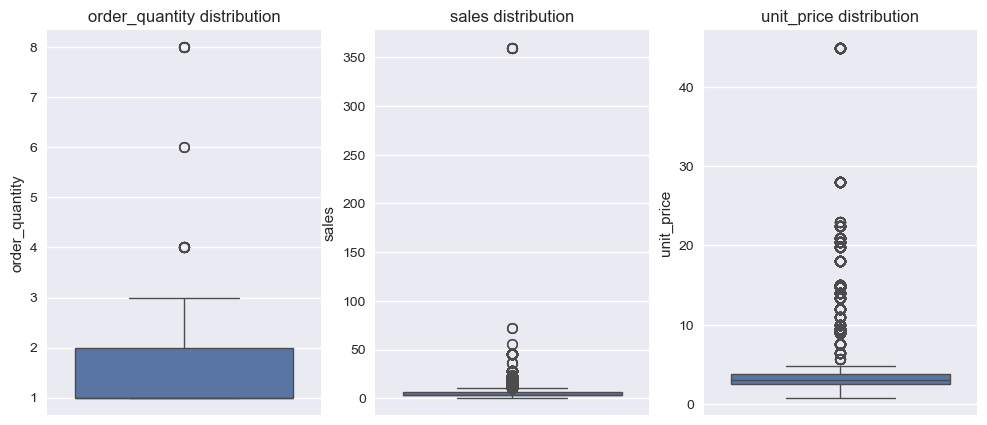

In [18]:
var = df[['order_quantity', 'sales', 'unit_price']]
plt.figure(figsize=(12,5))
for i,col in enumerate(var):
    plt.subplot(1,3,i+1)
    sns.boxplot(var[col])
    plt.title(f'{col} distribution')

plt.show()

- **Sales** - the skewed distribution of sales with some high outliers suggests that smaller transctions generate the bulk of total sales for the business.
- **Unit Price** - the presence of high outliers in unit price indicates that theres some varying range of products offerred, possibly premium products resulting in high unit prices. This also raises the question of pricing strategies, its worth digging deeper to find out if the premium products contribute significantly towards sales
- **Order Quantity** - there is a typical pattern of customers making small orders mostly ranging from 1-3 quantities per order. The business could look into strategies that encourage larger quanties per order and maybe bundle promotions

### Product Pricing

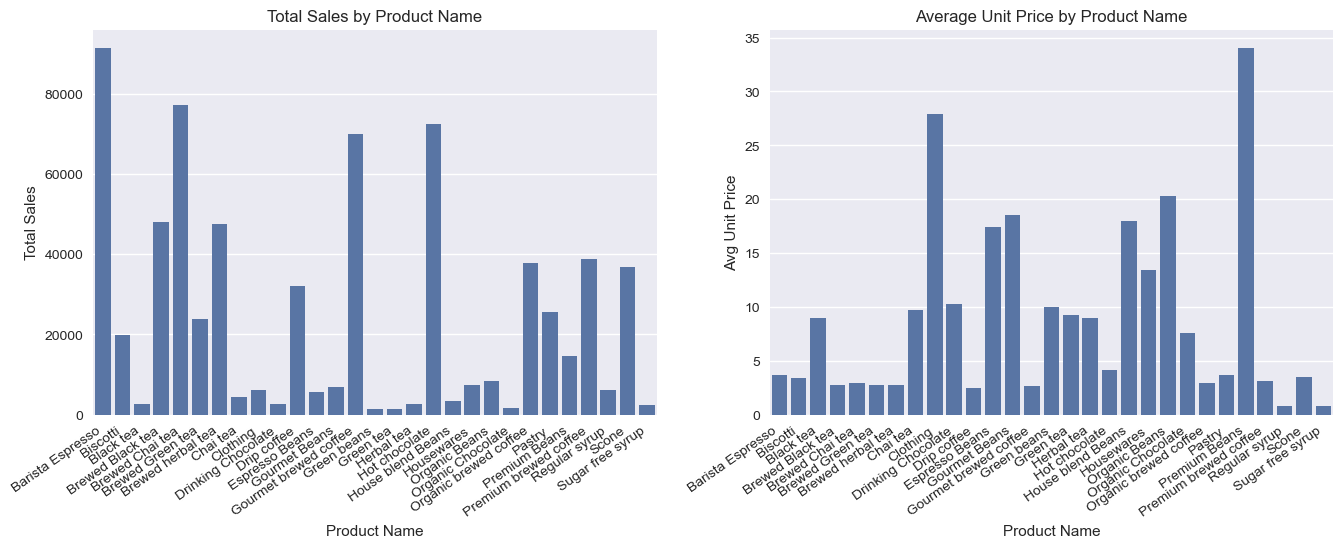

In [19]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sales = df.groupby('product_name')['sales'].sum()
sns.barplot(sales)
plt.title('Total Sales by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=35,ha='right')

plt.subplot(1,2,2)
avg_price = df.groupby('product_name')['unit_price'].mean()
sns.barplot(avg_price)
plt.title('Average Unit Price by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Avg Unit Price')
plt.xticks(rotation=35,ha='right')

plt.show()

- Its apparent that premium products ( aproximately avg_unit_price of $15 and above ) are generating significantly lower sales.
-  The charts above compare the product sales and its avg unit price.Products with lower avg unit prices seem to be generating the most sales.
-  The business should consider adjusting prices for premium products to make them more accessible to a broader audience.

### Feature Relationships

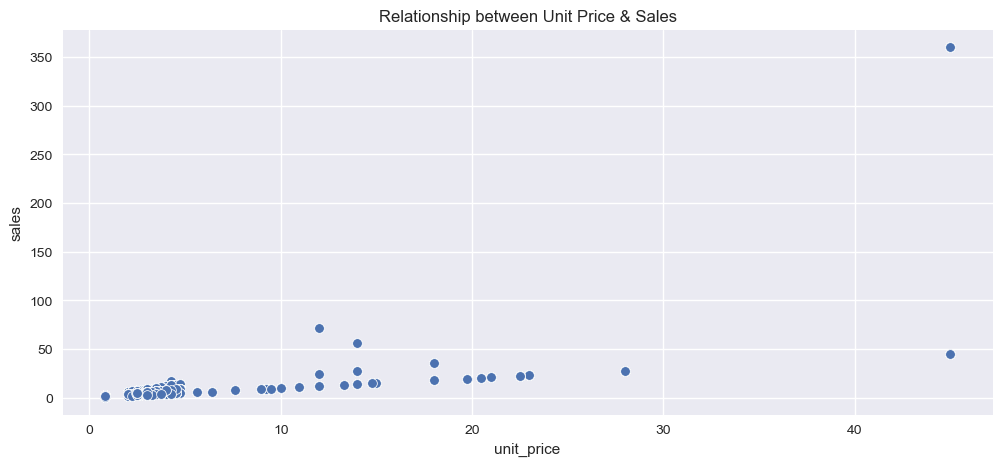

In [20]:
plt.figure(figsize=(12,5))
sns.scatterplot(var,x='unit_price',y='sales')
plt.title('Relationship between Unit Price & Sales')

plt.show()

- Most of the sales seem to be clustered around the unit price range of 1-5 , indicatiiong that most sale are for lower priced products.
- There are a few outliers aound unit price 30-40 , reaching sales of up to 350. This shows that while low there is a market for high prices goods.
- As unit price increase there is a slight increase in sales but generall most are concentrated on the lower end ,indicating price sensitivity among customers.

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px10px;">BUSINESS PROBLEMS </p>

1. **What are the total sales & quantity sold for the 6-month period?**
2. **Which product category is top-selling?**
3. **What is the %total for each product category towards sale?**
4. **What product name is top selling?**
5. **What are the sales distribution by store location?**
6. **How is each product category peforming by store location?**
7. **What are the hourly sales trends?**
8. **Are there any trends in sales by weekday?**
9. **How do sales vary by day?**
10. **Are there any seasonal patterns in sales?**

<a id="1"></a>
<p style="background-color:#4567b7;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px10px;">SALES ANALYSIS </p>

### 1.What are the total sales & quantity sold for the 6-month period?

In [21]:
#calculate total quantity sold
transaction_quantity = df['order_quantity'].sum()
print(f'Total Transaction Quantity:{transaction_quantity}')

#calculate total sales
total_sales = round(df['sales'].sum(),2)
print(f'Total Sales Revenue:{total_sales}')

Total Transaction Quantity:214468
Total Sales Revenue:698810.73


**Insights**

- The business has achieved $698,810 in sales revenue and sold 214,468 product items over the past 6 months.

### 2.Which product category is top-selling?

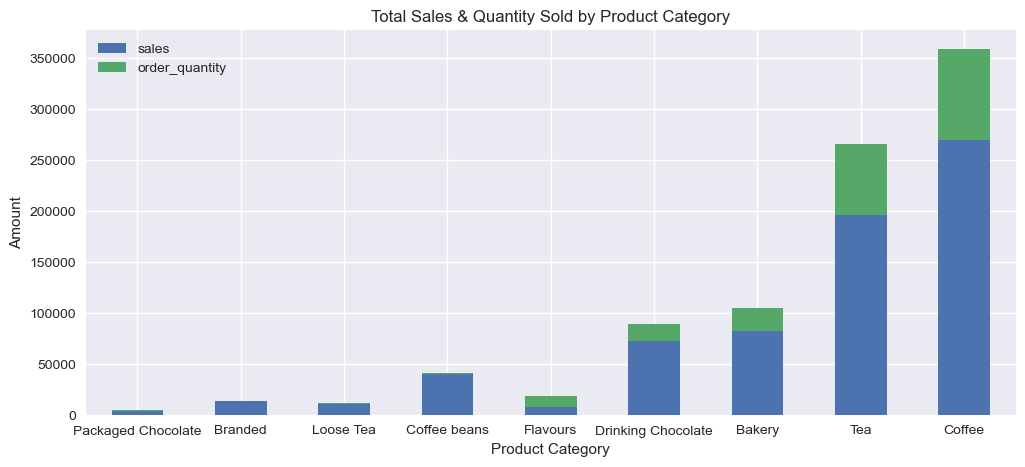

In [23]:
prod_cat = df.groupby('product_category')[['sales','order_quantity']].sum()
prod_cat = prod_cat.sort_values(by='order_quantity')
prod_cat.plot(kind='bar',figsize=(12,5),stacked=True)
plt.title('Total Sales & Quantity Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks(rotation = 0,ha='center')

plt.show()

**Insights**
- The most valuable products are COFFEE and TEA, accounting for approximately 66% of all sales. Conversely, PACKAGED CHOCOLATES is the least performing category, contributing only 0.6% of sales.
- These two categories are also accounting for the majotity of the quantity sold

### 3. What is the %total for each category towards sales?

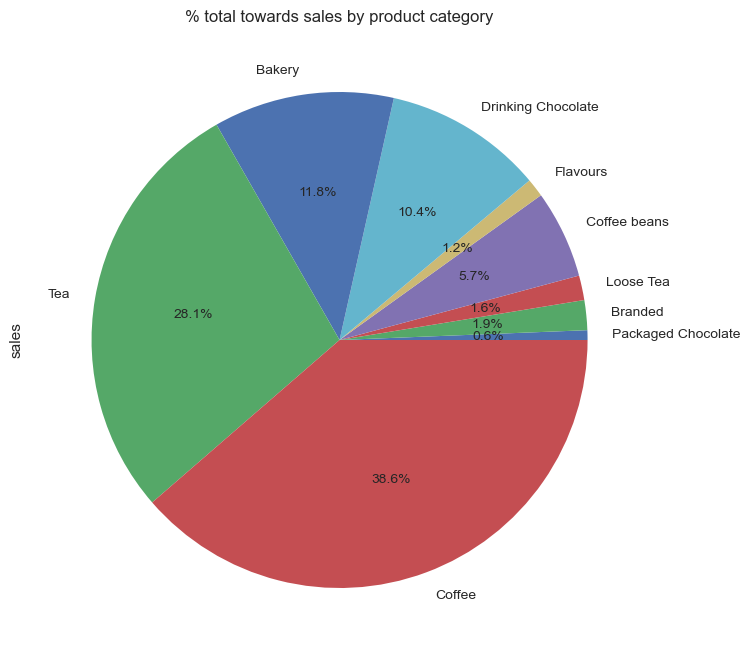

In [25]:
pro_cat = (prod_cat['sales']/total_sales)*100
pro_cat.plot(kind='pie',autopct='%1.1f%%',figsize=(8,12))
plt.title('% total towards sales by product category')

plt.show()

### 4.What are the 5 top selling products ?

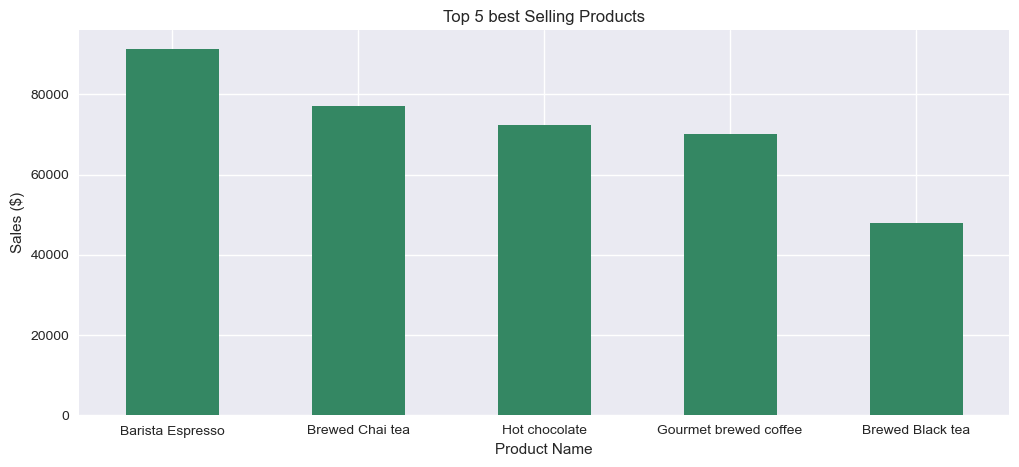

In [26]:
top_prod = df.groupby('product_name')['sales'].sum()
top_prod.nlargest(5).plot(kind='bar',figsize=(12,5),color='#348763')
plt.title('Top 5 best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0,ha='center')

plt.show()

**Insights**
- 
Upon conducting a detailed analysis at the product level, it is evident that the top five most popular products are all categorized under coffee and tea. Notably, the BARISTA ESPRESSO stands out as the highest-selling product in this category.

### 5.Top 5 underperforming product 

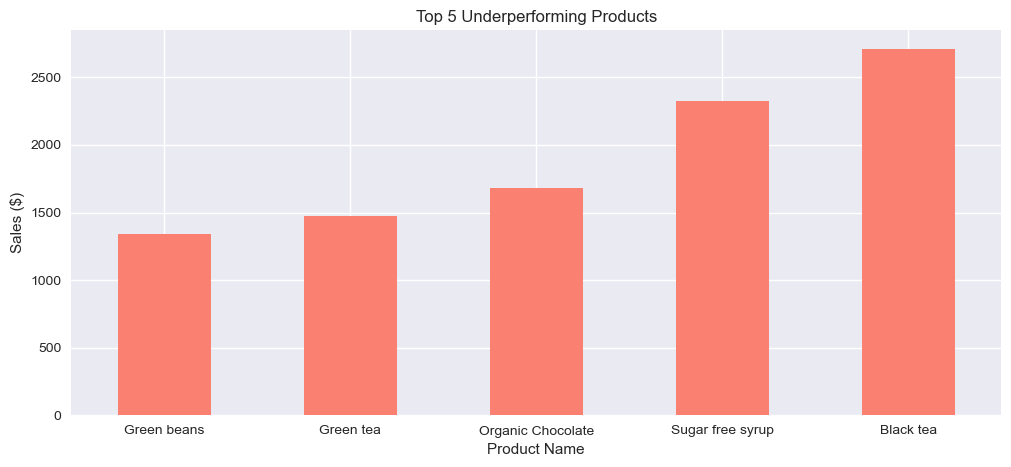

In [27]:
top_prod.nsmallest(5).plot(kind = 'bar', figsize = (12,5),color = '#FA8072')
plt.title('Top 5 Underperforming Products')
plt.xlabel('Product Name')
plt.ylabel('Sales ($)')
plt.xticks(rotation = 0,ha ='center')

plt.show()

**Insights**

The graph illustrates the five worst-performing products on the menu, with GREEN BEANS recording the lowest sales. To enhance overall performance, it would be prudent for the business to consider introducing new products that may better align with customer preferenceen! 

### 6.What are the sales distribution by store location?

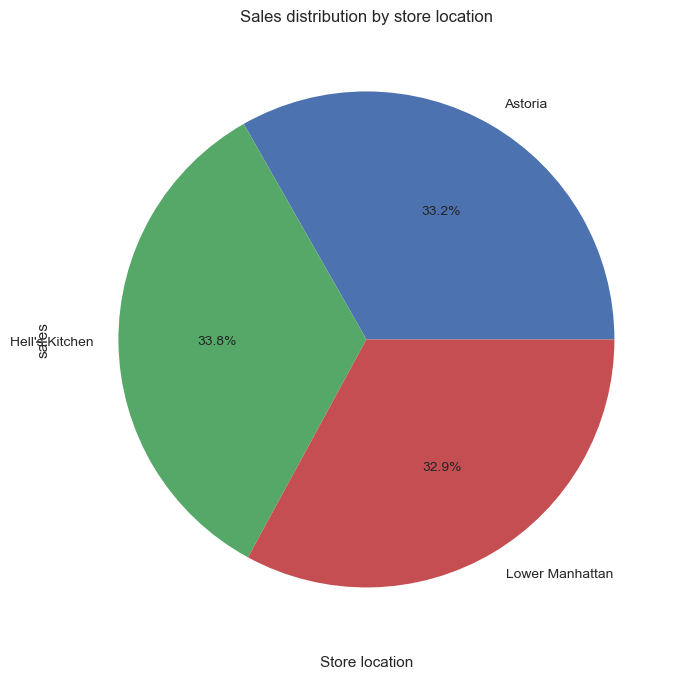

In [55]:
store = df.groupby('store_location')['sales'].sum()
store.plot(kind = 'pie',y = 'sales',figsize = (8,12), autopct = '%1.1f%%')
plt.title('Sales distribution by store location')
plt.xlabel('Store location')

plt.show()

**Insights**

- 
The chart indicates that sales are relatively consistent across all three store locations, with Manhattan exhibiting slightly higher sales figures. This reflects a balanced performance among the three locations.

### 7.How is each product category peforming by store location?

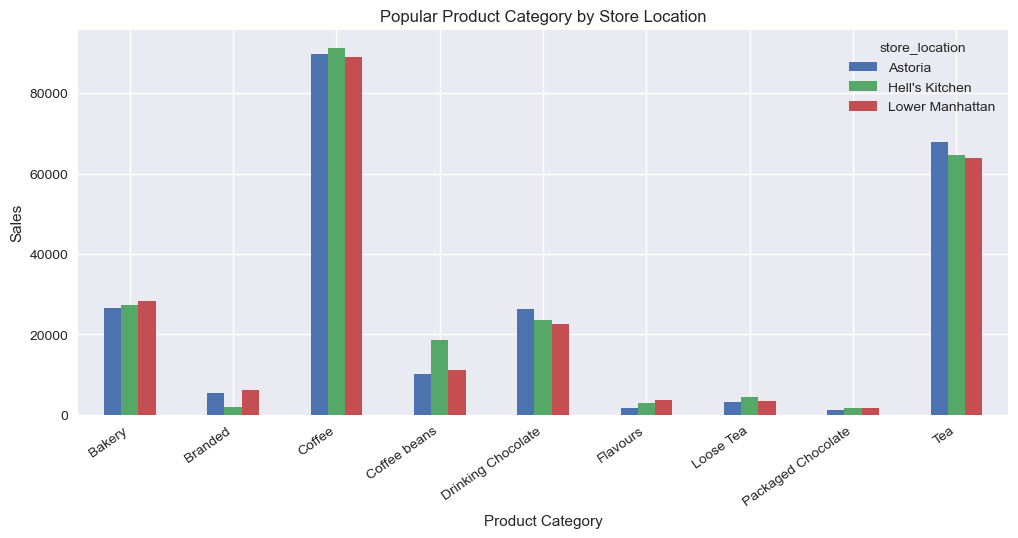

In [54]:
prod_pivot = df.pivot_table(index ='product_category',
                           columns = 'store_location',
                           values = 'sales',
                           aggfunc ='sum')

prod_pivot.plot(kind = 'bar',figsize = (12,5))
plt.title('Popular Product Category by Store Location')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.xticks(rotation = 35,ha ='right')

plt.show()

**Insight**

- A detailed examination of product category performance across all three store locations reveals that COFFEE and TEA are the dominant categories in each store. However, each location exhibits a slight advantage in specific categories; for example, Hell's Kitchen shows marginally higher sales in the coffee category, while Astoria leads in tea sales. 

- These minor advantages in each location present an opportunity to capitalize on by implementing targeted promotions for the product categories that are particularly popular in each specific store.

### 8. What are the hourly sales trends?

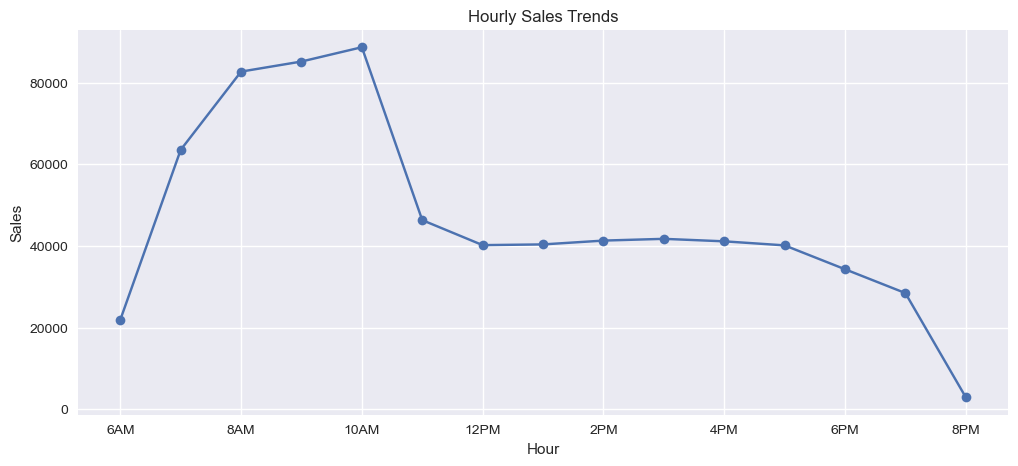

In [28]:
hourly_sales = df.groupby('hour')['sales'].sum()
hourly_sales.plot(kind ='line',figsize = (12,5), marker = 'o')
plt.title('Hourly Sales Trends')
plt.ylabel('Sales')
plt.xlabel('Hour')
plt.xticks(rotation = 0, ha = 'center')

plt.show()

**Insight**


- Hourly sales trends indicate that sales peak between 8 AM and 10 AM, which aligns with the common behavior of customers seeking hot beverages to start their day. Following the morning rush, sales remain steady from 11 AM to 6 PM

- This insight can be leveraged to optimize resource allocation; for example, ensuring sufficient staff is deployed during the morning peak hours. Additionally, sales notably decline between 7 PM and 8 PM, suggesting that the shop could consider closing at 6 PM to reduce operational costs.

### 9.Are there any trends in sales by weekday?

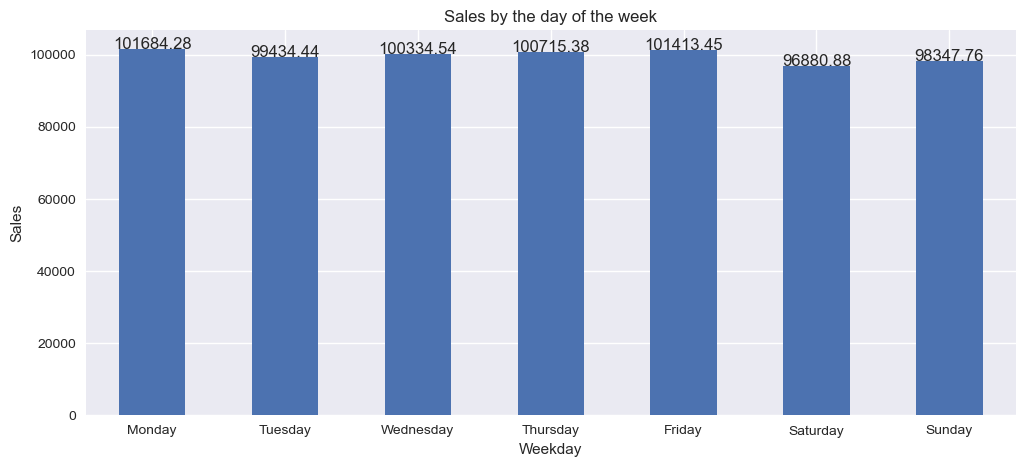

In [26]:
week_day = df.groupby('weekday')['sales'].sum()
week_day.plot(kind = 'bar',figsize=(12,5))
plt.title('Sales by the day of the week')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(rotation = 0,ha = 'center')

for i,v in enumerate(week_day):
    plt.text(i,v + 0.5, str(v),ha ='center',fontsize = 12)

plt.show()

**Insight**

- Sales exhibit slight day-to-day variations; however, overall sales activity remains generally consistent throughout the week, with no significant differences observed.

### 10.How do sales vary by day?

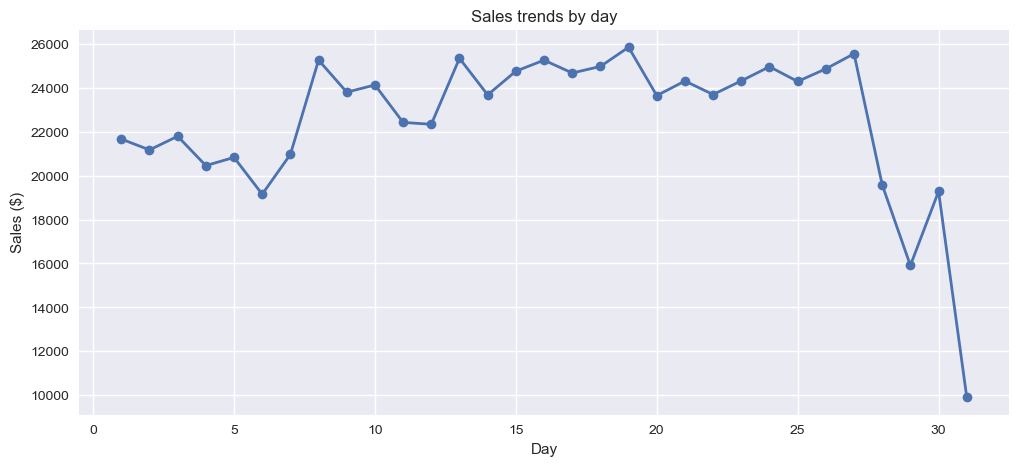

In [29]:
day = df.groupby('day')['sales'].sum()
day.plot(kind = 'line', figsize = (12,5), lw = 2,marker = 'o')
plt.title('Sales trends by day')
plt.xlabel('Day')
plt.ylabel('Sales ($)')
plt.xticks(rotation = 0,ha = 'center')

plt.show()

**Insight**
-  Sales fluctuate within the range of $22,000 to $26,000 from approximately the 8th to the 27th of the month. Notably, sales tend to decline toward the end of the month and during the initial days of the following mont
- To counteract this trend, the business could implement targeted promotions during these periods to stimulate sales and encourage customer engagement

### 11.Are there any seasonal patterns in sales?

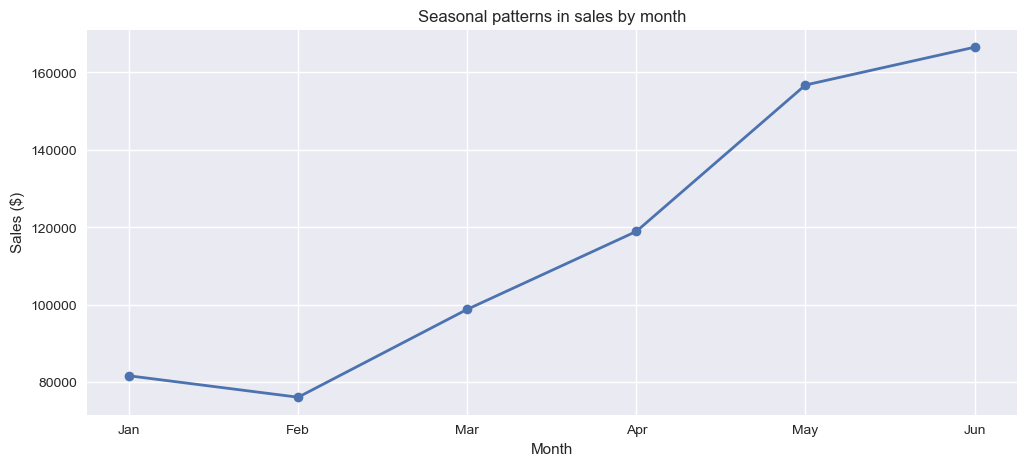

In [30]:
monthly_sales = df.groupby('month')['sales'].sum()
monthly_sales.plot(kind = 'line',figsize = (12,5),lw = 2,marker = 'o')
plt.title('Seasonal patterns in sales by month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation = 0,ha = 'center')

plt.show()

**Insight**

-
The monthly trend generally demonstrates an upward trajectory, indicating that the business is performing well. However, there is a noticeable dip in sales during February.

### Comprehensive Summary of Insights and Recommendations

1. **Product Popularity**: A detailed analysis at the product level reveals that the top five most popular products fall under the coffee and tea category, with the BARISTA ESPRESSO being the highest-selling item.  
   **Recommendation**: Continue to promote these popular items and consider introducing limited-time offers or seasonal variations to maintain customer interest.

2. **Underperforming Products**: The graph highlights the five worst-performing products on the menu, with GREEN BEANS showing the lowest sales.  
   **Recommendation**: To enhance overall performance, the business should explore the introduction of new products that may be more appealing to customers, possibly through customer surveys or trend analysis.

3. **Sales Consistency Across Locations**: Sales data indicates a relatively uniform performance across all three store locations, with Manhattan experiencing slightly higher sales.  
   **Recommendation**: Maintain consistent marketing strategies across all locations while tailoring promotions to highlight the unique strengths of each store.

4. **Category Performance by Location**: A closer examination of product category performance shows that COFFEE and TEA dominate in all locations. Hell's Kitchen leads in coffee sales, while Astoria excels in tea sales.  
   **Recommendation**: Leverage these small advantages by implementing targeted promotions for popular product categories in each specific store, such as coffee tastings in Hell's Kitchen and tea events in Astoria.

5. **Hourly Sales Trends**: Hourly sales trends reveal a peak in sales from 8 AM to 10 AM, aligning with customer behavior of purchasing hot beverages in the morning. Sales remain steady from 11 AM to 6 PM, but decline between 7 PM and 8 PM.  
   **Recommendation**: Optimize resource allocation by ensuring adequate staff during peak hours and consider closing at 6 PM to reduce operational costs during low sales periods.

6. **Daily Sales Variability**: Sales show slight fluctuations from day to day, but overall activity remains consistent throughout the week, with no significant differences observed.  
   **Recommendation**: Monitor daily sales closely to identify any emerging trends and adjust inventory and staffing accordingly.

7. **Monthly Sales Fluctuations**: Sales fluctuate between $22,000 and $26,000 from around the 8th to the 27th of the month, with a tendency for sales to decrease toward the end of the month and in the first few days of the following month.  
   **Recommendation**: Implement targeted promotions during these periods to stimulate sales and encourage customer engagement.

8. **Overall Monthly Trend**: The monthly trend indicates a generally upward movement, suggesting strong business performance, although there is a slight dip observed in February.  
   **Recommendation**: Conduct a deeper analysis to understand the factors contributing to the February dip and develop strategies to mitigate this trend, such as special promotions or events.

This summary encapsulates the key insights derived from the data analysis, along with actionable recommendations to enhance business performance and capitalize on opportunities for growth.